##Importing Libraries and Loading the Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

In [44]:
print(trader_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [45]:
print(sentiment_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


## Clean and Prepare Sentiment Data

In [49]:
# Keep only relevant columns
sentiment_df = sentiment_df[['date', 'value', 'sentiment']].copy()

# Convert date column to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


Cleaned sentiment data preview:
        date  value     sentiment
0 2018-02-01     30          Fear
1 2018-02-02     15  Extreme Fear
2 2018-02-03     40          Fear
3 2018-02-04     24  Extreme Fear
4 2018-02-05     11  Extreme Fear


In [51]:
print("Cleaned sentiment data")
print(sentiment_df.head())

Cleaned sentiment data
        date  value     sentiment
0 2018-02-01     30          Fear
1 2018-02-02     15  Extreme Fear
2 2018-02-03     40          Fear
3 2018-02-04     24  Extreme Fear
4 2018-02-05     11  Extreme Fear


In [53]:
# Converting Timestamp column to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')

# Extracting date only from timestamp
trader_df['date'] = trader_df['Timestamp'].dt.date

# converting date column to datetime format
trader_df['date'] = pd.to_datetime(trader_df['date'])

print(trader_df[['Timestamp', 'date']].head())


            Timestamp       date
0 2024-10-27 03:33:20 2024-10-27
1 2024-10-27 03:33:20 2024-10-27
2 2024-10-27 03:33:20 2024-10-27
3 2024-10-27 03:33:20 2024-10-27
4 2024-10-27 03:33:20 2024-10-27


In [54]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')
print("Merged data preview:")
print(merged_df.head())


Merged data preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0 

##correlation between sentiment and trader performance

In [55]:
correlation = merged_df['value'].corr(merged_df['Closed PnL'])

print(f"Correlation between Sentiment Value and Trader Closed PnL: {correlation:.4f}")


Correlation between Sentiment Value and Trader Closed PnL: 0.0111


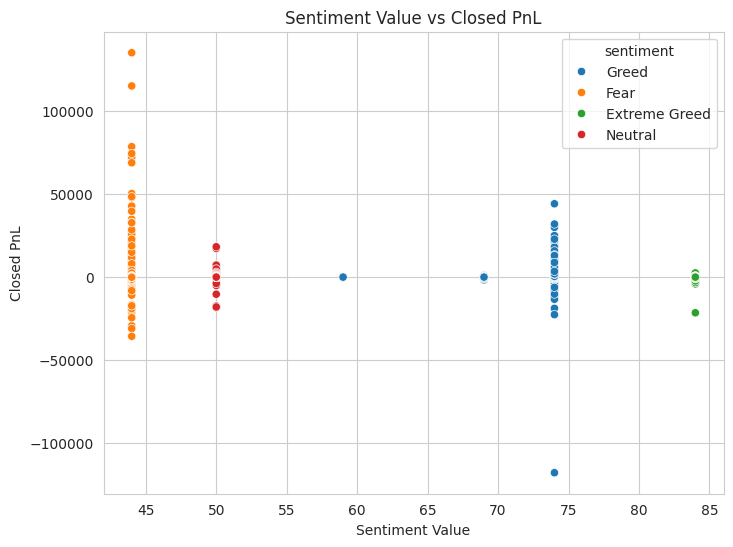

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', hue='sentiment')
plt.title("Sentiment Value vs Closed PnL")
plt.xlabel("Sentiment Value")
plt.ylabel("Closed PnL")
plt.grid(True)
plt.show()


## Analyzing average PnL per sentiment category

In [57]:
# Group by sentiment and calculate mean Closed PnL
sentiment_pnl = merged_df.groupby('sentiment')['Closed PnL'].mean().reset_index()

print("Average Closed PnL per Sentiment:")
print(sentiment_pnl)


Average Closed PnL per Sentiment:
       sentiment  Closed PnL
0  Extreme Greed   25.418772
1           Fear   50.047622
2          Greed   87.894859
3        Neutral   22.229713


<ipython-input-58-8d67d9f9ea77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_pnl, x='sentiment', y='Closed PnL', palette='viridis')


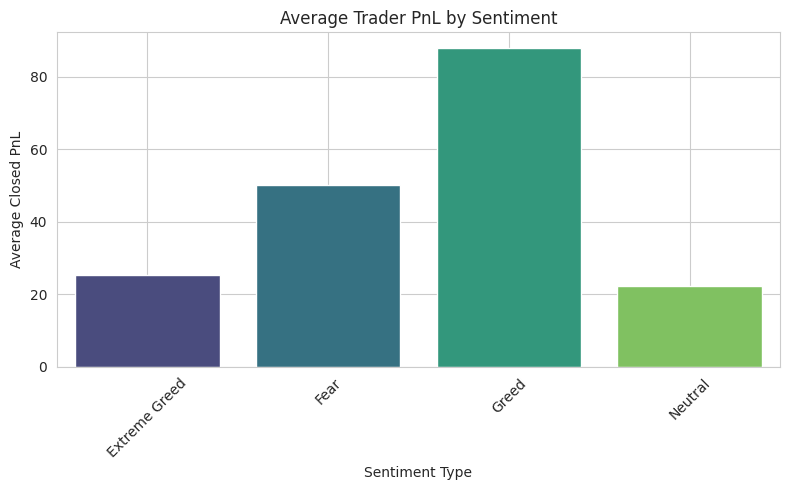

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_pnl, x='sentiment', y='Closed PnL', palette='viridis')
plt.title("Average Trader PnL by Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Sentiment Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Summary**

In [59]:
# Calculate overall correlation again just for reference
correlation = merged_df['value'].corr(merged_df['Closed PnL'])

# Summary
print("Summary of Findings:")
print(f"The correlation between Fear Greed Index value and traders Closed PnL is: {correlation:.4f}")
print("Average PnL per sentiment category shows how the trader performs under different market emotions")
print("This can help identify if the trader does better during Extreme Fear, Greed, or Neutral phases")
print("The insights can guide strategy adjustment depending on market sentiment")


Summary of Findings:
The correlation between Fear Greed Index value and traders Closed PnL is: 0.0111
Average PnL per sentiment category shows how the trader performs under different market emotions
This can help identify if the trader does better during Extreme Fear, Greed, or Neutral phases
The insights can guide strategy adjustment depending on market sentiment


In [60]:
sentiment_pnl.to_csv("average_pnl_by_sentiment.csv", index=False)
merged_df.to_csv("merged_trader_sentiment_data.csv", index=False)
